In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.business_analysis import get_plague_crops, get_plagues, get_crops, get_tuples

## Plague-Crop

In [48]:
plague_crops = get_plague_crops()

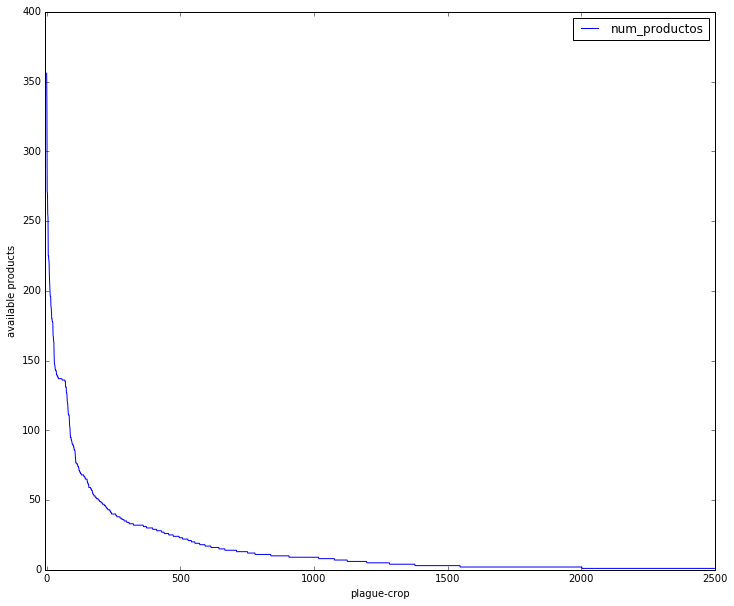

In [49]:
plague_crops.plot(figsize=(12,10))
plt.xlim([-5,2500])
plt.xlabel("plague-crop")
plt.ylabel("available products")
plt.show()

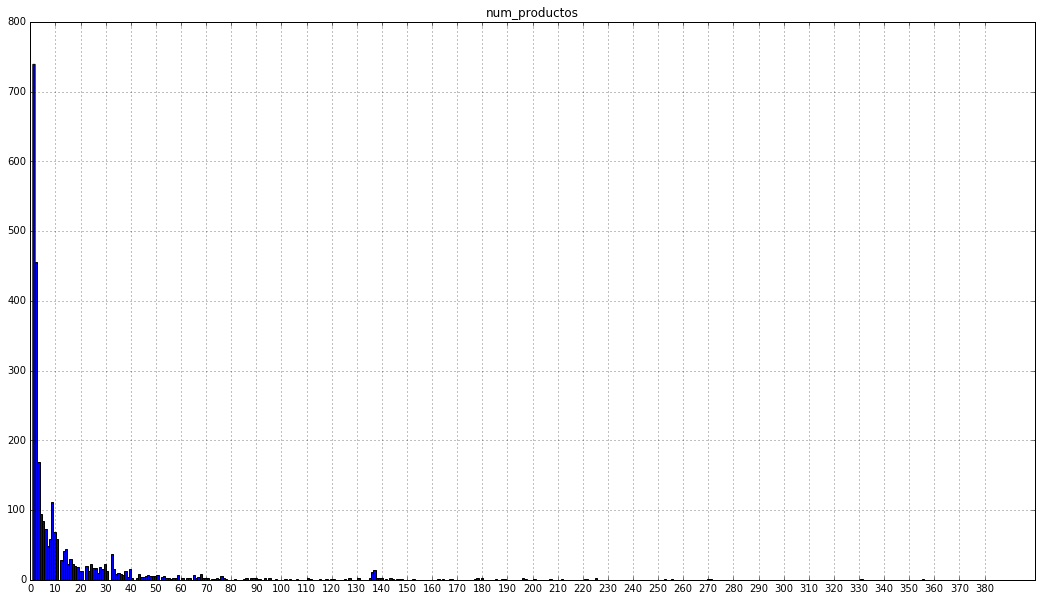

In [38]:
plague_crops.hist(figsize=(18,10), bins=390)
plt.xticks(np.arange(0,390,10))
plt.show()

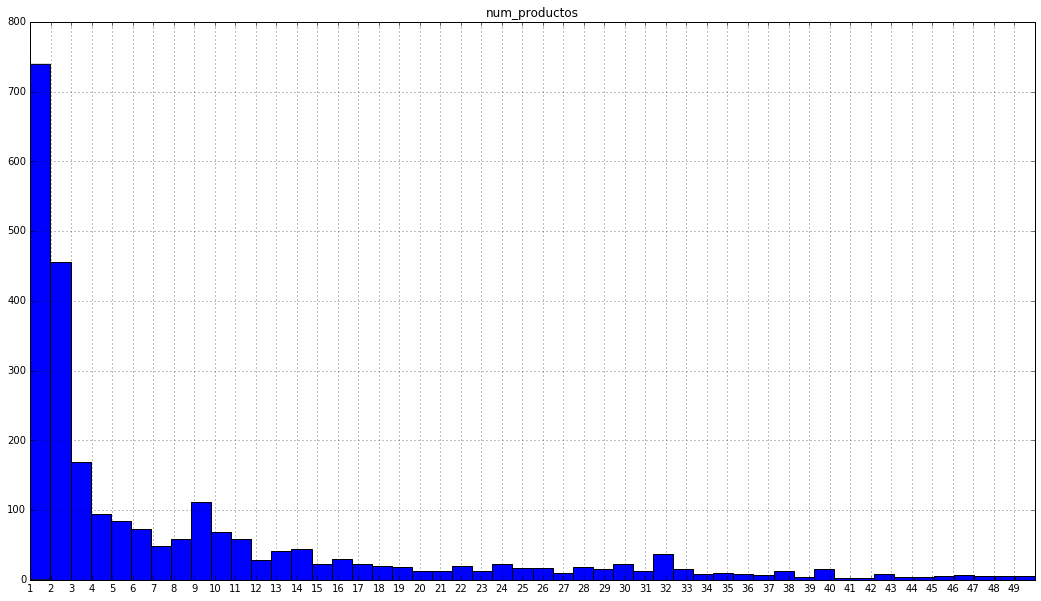

In [7]:
granularity = 50
plague_crops.loc[plague_crops["num_productos"] <= granularity].hist(figsize=(18,10), bins=granularity)
plt.xlim([1, granularity])
plt.xticks(np.arange(1,granularity,1))
plt.show()

## Plagues

In [40]:
plagues = get_plagues()

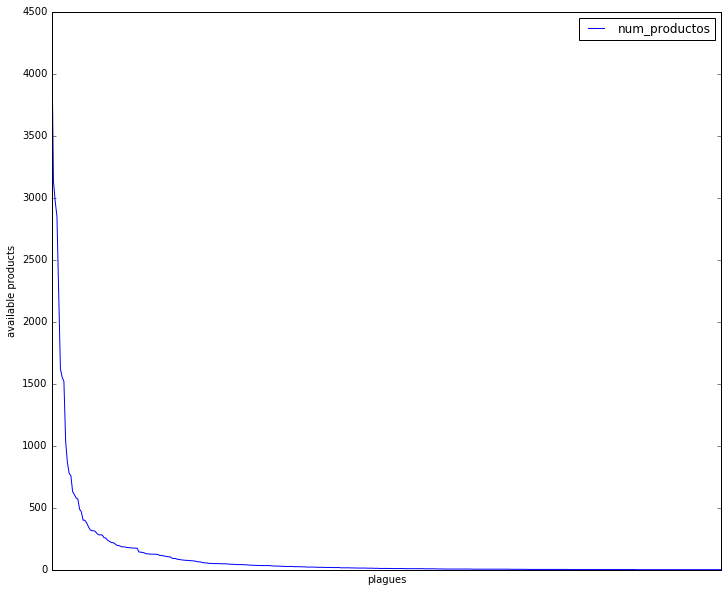

In [43]:
plagues.plot(figsize=(12,10))
#plt.xlim([-5,2500])
plt.xticks(())
plt.xlabel("plagues")
plt.ylabel("available products")
plt.show()

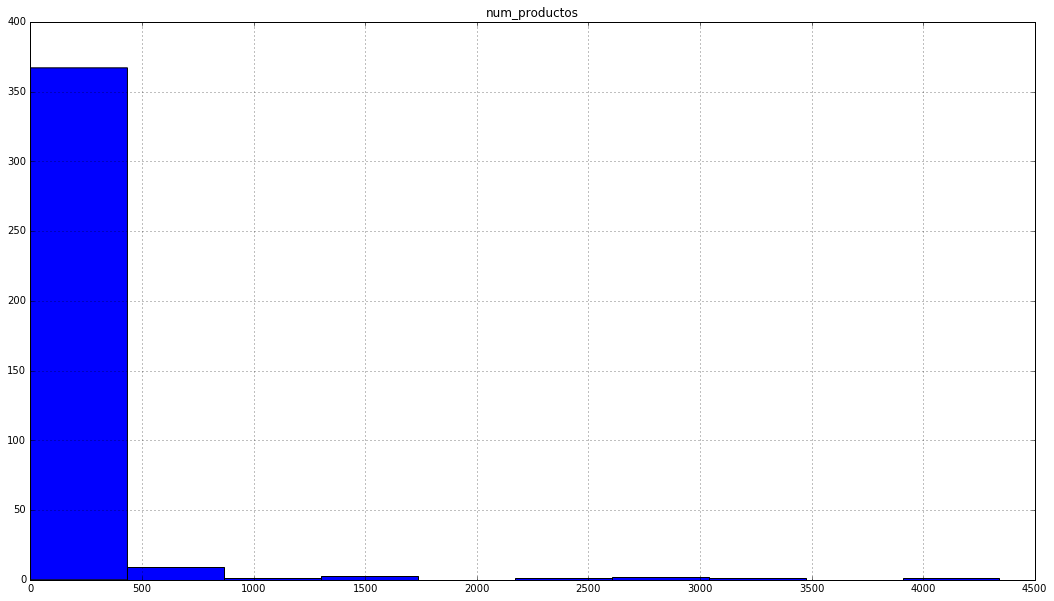

In [9]:
plagues.hist(figsize=(18,10)) #, bins=30)
#plt.xticks(np.arange(0,400,10))
plt.show()

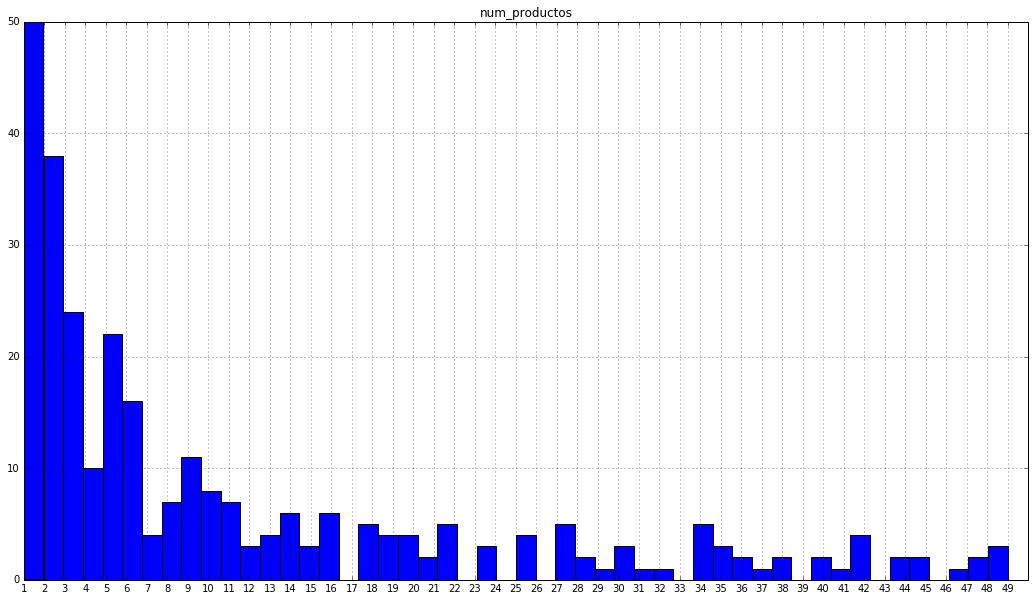

In [16]:
plagues.loc[plagues["num_productos"] < 50].hist(figsize=(18,10), bins=50)
plt.xticks(np.arange(0,50,1))
plt.xlim([1, 50])
plt.show()

## Crops

In [44]:
crops = get_crops()

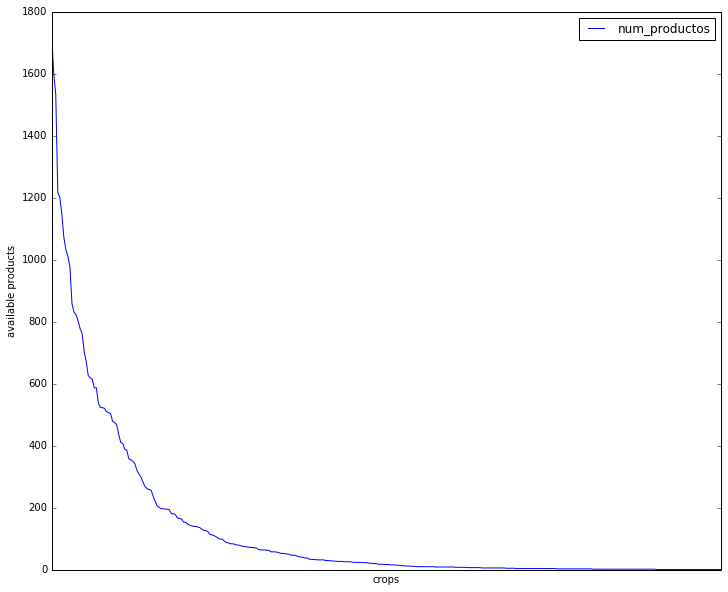

In [46]:
crops.plot(figsize=(12,10))
#plt.xlim([-5,2500])
plt.xticks(())
plt.xlabel("crops")
plt.ylabel("available products")
plt.show()

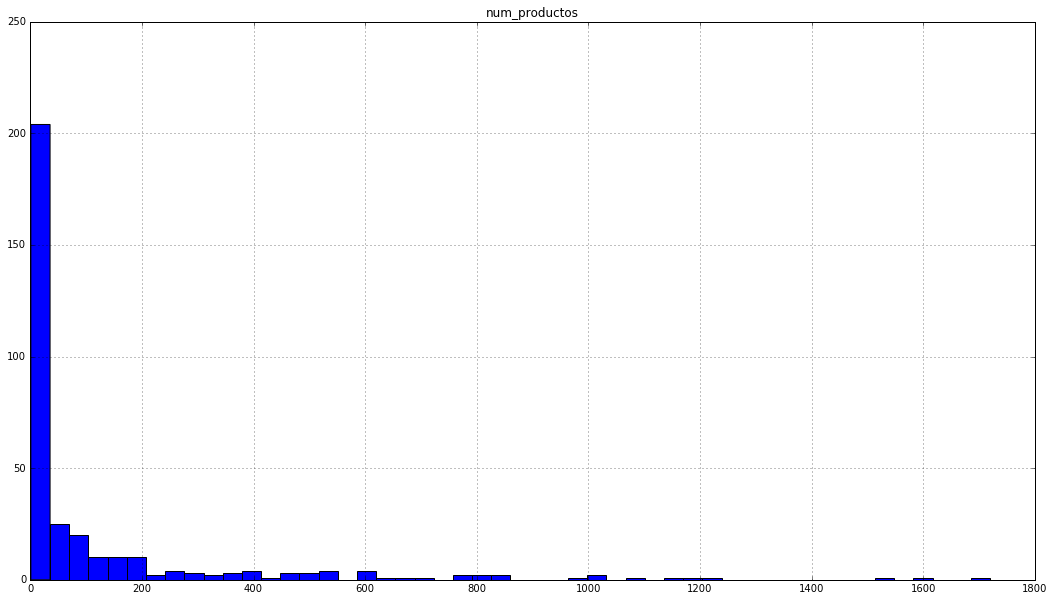

In [18]:
crops.hist(figsize=(18,10), bins=50)
#plt.xticks(np.arange(0,50,1))
plt.show()

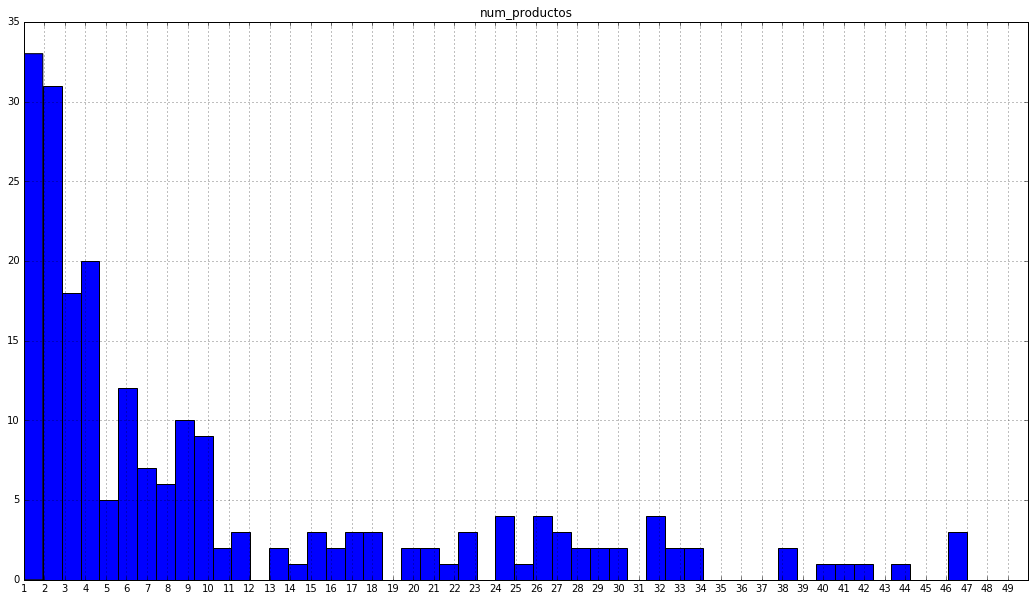

In [19]:
crops.loc[crops["num_productos"] < 50].hist(figsize=(18,10), bins=50)
plt.xticks(np.arange(0,50,1))
plt.xlim([1, 50])
plt.show()

In [65]:
original_tuples = get_tuples()

In [ ]:
for ex in range(30):
    tuples = get_tuples()
    tuples = [x for x in tuples]

    risk = 0
    quiet = 0
    number_of_removes = int(len(tuples) * 0.6)

    for i in range(number_of_removes):
        remove = np.random.randint(1, len(tuples)-1)
        removed = tuples[remove]
        if tuples[remove + 1] != removed and tuples[remove - 1] != removed:
            risk+=1
            del tuples[remove]
        else:
            quiet+=1

    print(risk)
    print((risk/len(original_tuples) * 100) + "%")